
Correlation to Wins (W):
L            -1.000
RA           -0.897
WHIP         -0.895
ERA          -0.894
R            -0.888
ER           -0.884
K/BB          0.853
H/9          -0.843
IP            0.841
K%            0.834
BB            0.828
OBP           0.827
H_allowed    -0.816
OPS           0.777
K/9           0.763
SLG           0.718
HR            0.709
BB/9         -0.680
TB            0.673
BABIP        -0.668
XBH           0.660
BB_allowed   -0.650
BB%          -0.592
HR/9         -0.552
HR_allowed   -0.507
AVG           0.383
H             0.352
HBP           0.247
G             0.224
SO           -0.173
CS           -0.157
SB            0.126
Name: W, dtype: float64


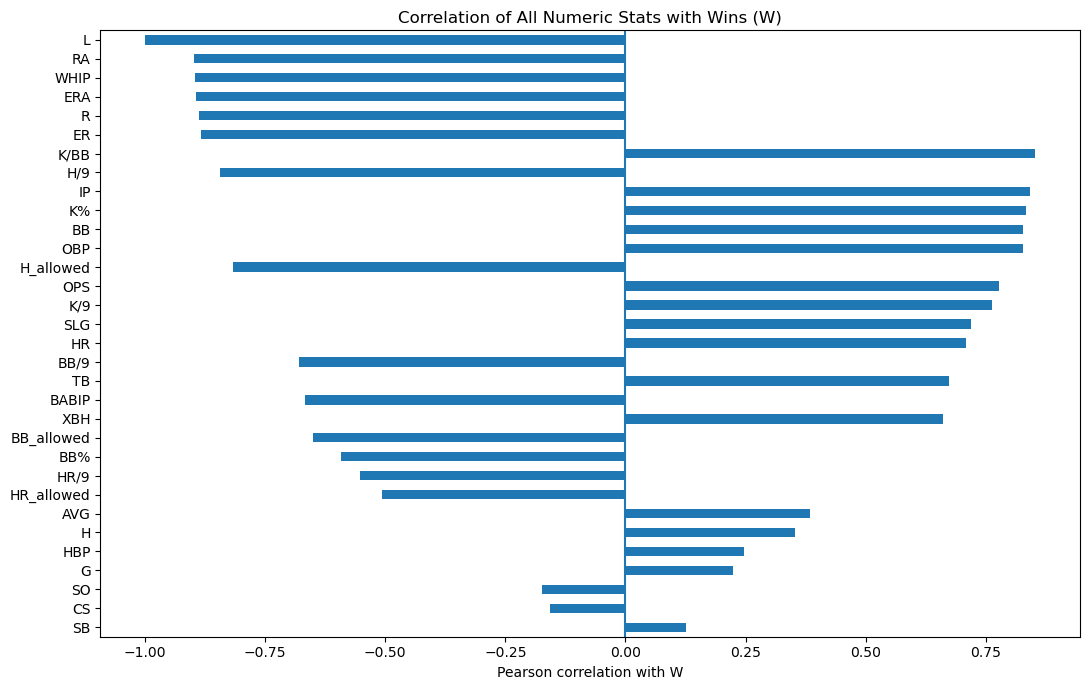

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



file_path = r"TEAM STATS LAST 10 YEARS.xlsx"   

# Read all stats
df = pd.read_excel(file_path, engine="openpyxl")


df = df.rename(columns={
    "H.1":  "H_allowed",
    "HR.1": "HR_allowed",
    "BB.1": "BB_allowed",
})

# Keep numeric only for correlation
num_df = df.select_dtypes(include=[np.number])

# Correlation to wins (W)
corr_to_wins = (
    num_df.corr(numeric_only=True)["W"]
    .drop("W")
    .sort_values(key=lambda s: s.abs(), ascending=False)
)

print("\nCorrelation to Wins (W):")
print(corr_to_wins.round(3))

# Plot
plt.figure(figsize=(11, 7))
corr_to_wins.plot(kind="barh")
plt.axvline(0)
plt.title("Correlation of All Numeric Stats with Wins (W)")
plt.xlabel("Pearson correlation with W")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



=== Win Impact (Causation-Leaning) Index ===
          Stat  Standardized_Impact
0          ERA              -9.3247
1           HR               9.2456
2           BB               7.1480
3          OBP               7.0028
4           SB               6.5147
5          OPS               6.1368
6         HR/9              -5.8525
7          SLG               5.4197
8   HR_allowed              -5.0384
9          H/9              -4.7540
10   H_allowed              -4.7261
11        WHIP              -4.7005
12          IP               4.5866
13       BABIP              -4.1775
14          TB               3.7796
15        BB/9              -3.5317
16  BB_allowed              -3.2668
17           G              -2.8470
18         AVG               2.6122
19         BB%              -2.5163
20          K%               1.8144
21        K/BB               1.7914
22         HBP              -1.7734
23          SO              -1.1573
24         XBH               1.0482
25         K/9    

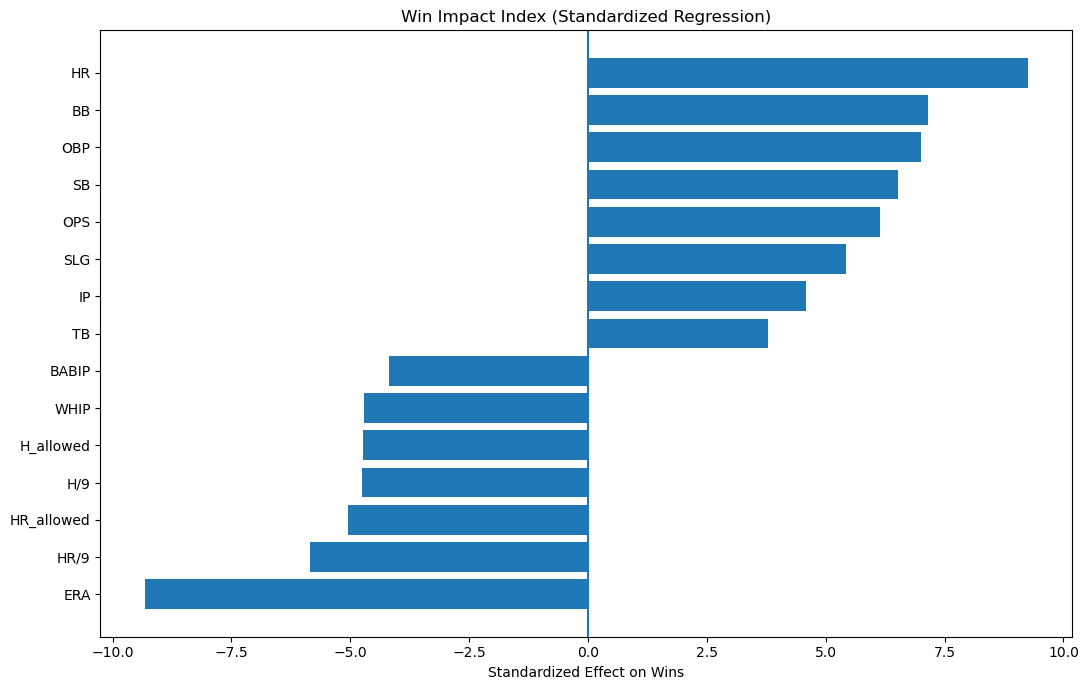

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline

# -----------------------------
# 1) Load data
# -----------------------------
FILE_PATH = r"TEAM STATS LAST 10 YEARS.xlsx"
df = pd.read_excel(FILE_PATH, engine="openpyxl")

# Rename duplicated pitching columns if present
df = df.rename(columns={
    "H.1":  "H_allowed",
    "HR.1": "HR_allowed",
    "BB.1": "BB_allowed",
})

# -----------------------------
# 2) Prepare data
# -----------------------------
# Target
y = df["W"]

# Numeric predictors only
num_df = df.select_dtypes(include=[np.number]).copy()

# Drop target and obvious outcome proxies
drop_cols = ["W", "L", "R", "RA", "ER"]
X = num_df.drop(columns=[c for c in drop_cols if c in num_df.columns])

# -----------------------------
# 3) Standardized regression (Causation Index)
# -----------------------------
model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=np.logspace(-3, 3, 200)))
])

model.fit(X, y)

betas = model.named_steps["ridge"].coef_

impact_index = (
    pd.DataFrame({
        "Stat": X.columns,
        "Standardized_Impact": betas
    })
    .assign(Abs_Impact=lambda d: d["Standardized_Impact"].abs())
    .sort_values("Abs_Impact", ascending=False)
    .reset_index(drop=True)
)

print("\n=== Win Impact (Causation-Leaning) Index ===")
print(impact_index[["Stat", "Standardized_Impact"]].round(4))

# Save to CSV
impact_index.to_csv("win_impact_index.csv", index=False)

# -----------------------------
# 4) Plot top drivers of wins
# -----------------------------
TOP_N = 15
plot_df = impact_index.head(TOP_N).sort_values("Standardized_Impact")

plt.figure(figsize=(11, 7))
plt.barh(plot_df["Stat"], plot_df["Standardized_Impact"])
plt.axvline(0)
plt.title("Win Impact Index (Standardized Regression)")
plt.xlabel("Standardized Effect on Wins")
plt.tight_layout()
plt.show()



=== HITTERS: Advanced -> Broad correlations ===


,BA,OBP_approx,BABIP,HR_rate
xba,0.761,0.499,0.340,-0.011
xwoba,0.324,0.665,0.125,0.688
exit_velocity_avg,-0.011,0.267,0.124,0.596
launch_angle_avg,-0.224,-0.023,-0.392,0.447
sweet_spot_percent,0.104,0.212,0.181,0.132
barrel_batted_rate,-0.123,0.203,-0.041,0.878
hard_hit_percent,-0.069,0.198,0.118,0.633
oz_swing_percent,0.090,-0.499,-0.004,-0.013
iz_contact_percent,0.330,-0.009,-0.101,-0.586
k_percent,-0.512,-0.189,0.087,0.480


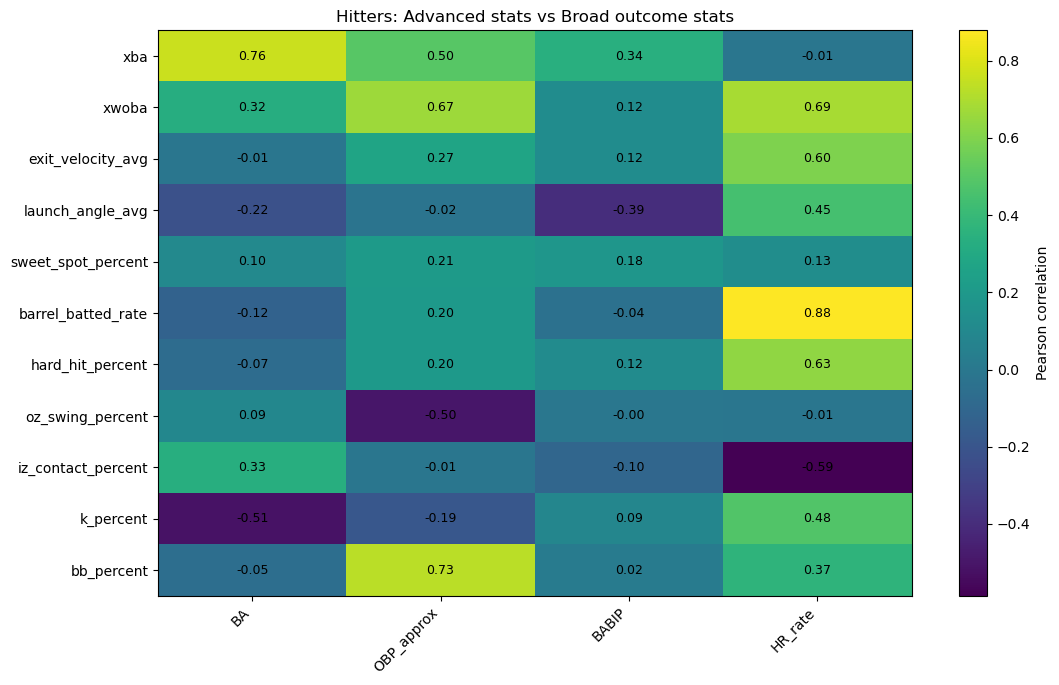


Top hitter links:


,advanced_stat,broad_stat,corr,abs_corr
23,barrel_batted_rate,HR_rate,0.878,0.878
0,xba,BA,0.761,0.761
41,bb_percent,OBP_approx,0.729,0.729
7,xwoba,HR_rate,0.688,0.688
5,xwoba,OBP_approx,0.665,0.665
27,hard_hit_percent,HR_rate,0.633,0.633
11,exit_velocity_avg,HR_rate,0.596,0.596
35,iz_contact_percent,HR_rate,-0.586,0.586
36,k_percent,BA,-0.512,0.512
1,xba,OBP_approx,0.499,0.499



=== PITCHERS: Advanced -> Broad correlations ===


,k_percent,bb_percent,babip,p_era
whiff_percent,0.892,-0.014,-0.063,-0.533
z_swing_miss_percent,0.809,-0.147,-0.218,-0.589
oz_swing_percent,0.466,-0.497,-0.060,-0.352
in_zone_percent,-0.079,-0.444,-0.181,-0.089
f_strike_percent,0.209,-0.563,0.006,-0.203
exit_velocity_avg,-0.290,0.242,0.151,0.464
barrel_batted_rate,-0.265,-0.009,-0.012,0.430
hard_hit_percent,-0.294,0.230,0.125,0.424
xwoba,-0.826,0.340,0.277,0.798
Called strike share,-0.133,0.187,0.089,0.022


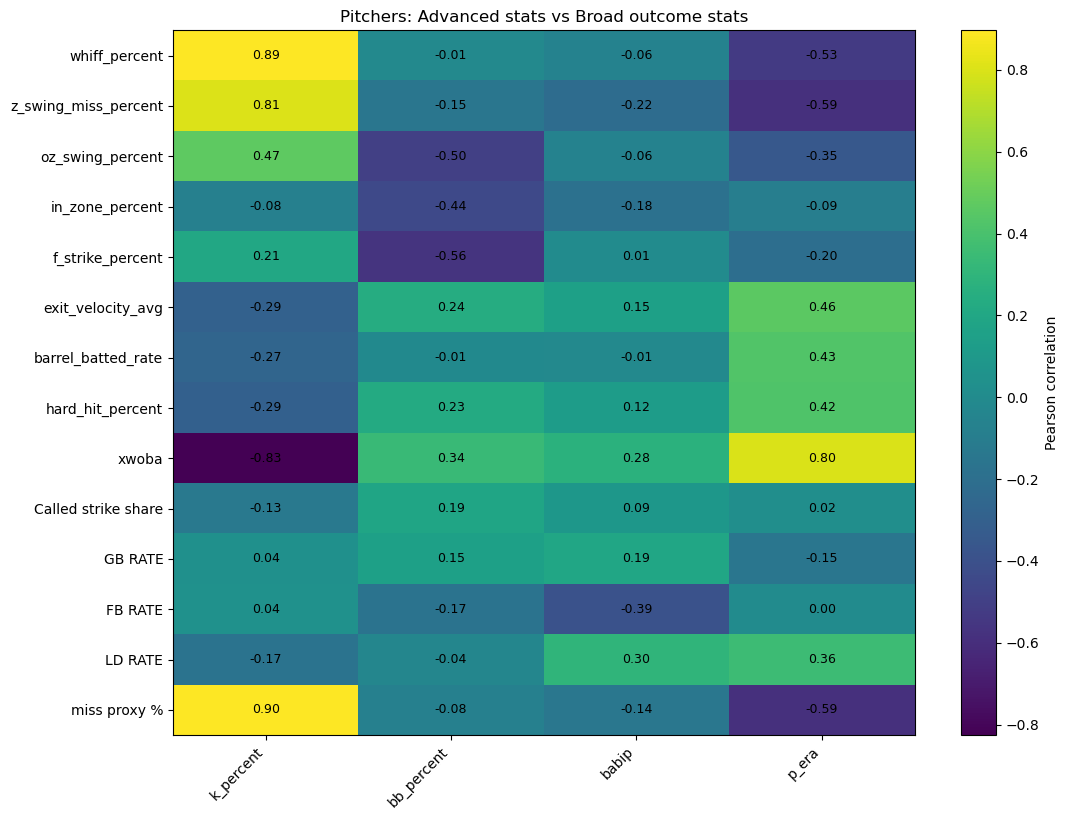


Top pitcher links:


,advanced_stat,broad_stat,corr,abs_corr
52,miss proxy %,k_percent,0.897,0.897
0,whiff_percent,k_percent,0.892,0.892
32,xwoba,k_percent,-0.826,0.826
4,z_swing_miss_percent,k_percent,0.809,0.809
35,xwoba,p_era,0.798,0.798
7,z_swing_miss_percent,p_era,-0.589,0.589
55,miss proxy %,p_era,-0.586,0.586
17,f_strike_percent,bb_percent,-0.563,0.563
3,whiff_percent,p_era,-0.533,0.533
9,oz_swing_percent,bb_percent,-0.497,0.497



Saved CSVs:
 - hitter_adv_vs_broad_corr_2025.csv
 - pitcher_adv_vs_broad_corr_2025.csv


In [2]:
# ============================================================
# Advanced stats -> Broad outcome correlations (WIDE heatmaps)
# Hitters + Pitchers | 2025
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Paths (edit if needed)
# -----------------------------
HITTERS_PATH = "hitters 2025.csv"
PITCHERS_PATH = "pitchers 2025.csv"

# -----------------------------
# Helpers
# -----------------------------
def to_prop(s: pd.Series) -> pd.Series:
    """Convert 0–100 percent columns to 0–1 if needed."""
    s = pd.to_numeric(s, errors="coerce")
    if np.nanmedian(s) > 1:
        return s / 100.0
    return s

def corr_table(df: pd.DataFrame, adv_cols, broad_cols, method="pearson"):
    """Matrix: rows=advanced stats, cols=broad stats."""
    use = list(dict.fromkeys(adv_cols + broad_cols))
    tmp = df[use].apply(pd.to_numeric, errors="coerce")
    out = pd.DataFrame(index=adv_cols, columns=broad_cols, dtype=float)
    for a in adv_cols:
        for b in broad_cols:
            out.loc[a, b] = tmp[a].corr(tmp[b], method=method)
    return out

def plot_corr_heatmap(corr_df: pd.DataFrame, title: str):
    """WIDE, readable heatmap (matplotlib only)."""
    data = corr_df.values.astype(float)

    # Auto-size: wider with more columns, taller with more rows
    fig_width  = 1.8 * corr_df.shape[1] + 4
    fig_height = 0.45 * corr_df.shape[0] + 2

    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    im = ax.imshow(data, aspect="auto")

    ax.set_xticks(range(corr_df.shape[1]))
    ax.set_xticklabels(corr_df.columns, rotation=45, ha="right")
    ax.set_yticks(range(corr_df.shape[0]))
    ax.set_yticklabels(corr_df.index)

    ax.set_title(title)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Pearson correlation")

    # annotate cells
    for i in range(corr_df.shape[0]):
        for j in range(corr_df.shape[1]):
            val = corr_df.iloc[i, j]
            if pd.notna(val):
                ax.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=9)

    plt.tight_layout()
    plt.show()

def top_links(corr_df: pd.DataFrame, n=20):
    tidy = (
        corr_df.stack()
        .reset_index()
        .rename(columns={"level_0":"advanced_stat","level_1":"broad_stat",0:"corr"})
        .dropna()
    )
    tidy["abs_corr"] = tidy["corr"].abs()
    return tidy.sort_values("abs_corr", ascending=False).head(n)

# ============================================================
# Load data
# ============================================================
hit = pd.read_csv(HITTERS_PATH)
pit = pd.read_csv(PITCHERS_PATH)

# ============================================================
# HITTERS: build broad outcomes
# ============================================================

# Clean percent columns
for c in ["k_percent","bb_percent","sweet_spot_percent","barrel_batted_rate",
          "hard_hit_percent","oz_swing_percent","iz_contact_percent"]:
    if c in hit.columns:
        hit[c] = to_prop(hit[c])

# Broad outcomes
hit["BA"] = hit["hit"] / hit["ab"]
hit["HR_rate"] = hit["home_run"] / hit["ab"]
hit["BABIP"] = (hit["hit"] - hit["home_run"]) / (
    hit["ab"] - hit["strikeout"] - hit["home_run"] + hit["b_sac_fly"]
)

# Approx OBP using BB%
hit["PA_approx"] = (hit["ab"] + hit["b_sac_fly"]) / (1 - hit["bb_percent"])
hit["BB_approx"] = hit["bb_percent"] * hit["PA_approx"]
hit["OBP_approx"] = (hit["hit"] + hit["BB_approx"]) / (
    hit["ab"] + hit["BB_approx"] + hit["b_sac_fly"]
)

hitter_broad = ["BA","OBP_approx","BABIP","HR_rate"]
hitter_adv = [
    "xba","xwoba",
    "exit_velocity_avg","launch_angle_avg",
    "sweet_spot_percent","barrel_batted_rate","hard_hit_percent",
    "oz_swing_percent","iz_contact_percent",
    "k_percent","bb_percent",
]
hitter_adv   = [c for c in hitter_adv if c in hit.columns]
hitter_broad = [c for c in hitter_broad if c in hit.columns]

hit_corr = corr_table(hit, hitter_adv, hitter_broad)

print("\n=== HITTERS: Advanced -> Broad correlations ===")
display(hit_corr.round(3))
plot_corr_heatmap(hit_corr, "Hitters: Advanced stats vs Broad outcome stats")

print("\nTop hitter links:")
display(top_links(hit_corr, 20).round(3))

hit_corr.to_csv("hitter_adv_vs_broad_corr_2025.csv")

# ============================================================
# PITCHERS: broad outcomes
# ============================================================

# Clean percent columns
for c in ["k_percent","bb_percent","barrel_batted_rate","hard_hit_percent",
          "z_swing_miss_percent","oz_swing_percent","in_zone_percent",
          "whiff_percent","f_strike_percent"]:
    if c in pit.columns:
        pit[c] = to_prop(pit[c])

pitcher_broad = ["k_percent","bb_percent","babip","p_era"]

pitcher_adv = [
    "whiff_percent","z_swing_miss_percent","oz_swing_percent",
    "in_zone_percent","f_strike_percent",
    "exit_velocity_avg","barrel_batted_rate","hard_hit_percent","xwoba",
    "Called strike share","GB RATE","FB RATE","LD RATE","miss proxy %",
]
pitcher_adv   = [c for c in pitcher_adv if c in pit.columns]
pitcher_broad = [c for c in pitcher_broad if c in pit.columns]

pit_corr = corr_table(pit, pitcher_adv, pitcher_broad)

print("\n=== PITCHERS: Advanced -> Broad correlations ===")
display(pit_corr.round(3))
plot_corr_heatmap(pit_corr, "Pitchers: Advanced stats vs Broad outcome stats")

print("\nTop pitcher links:")
display(top_links(pit_corr, 20).round(3))

pit_corr.to_csv("pitcher_adv_vs_broad_corr_2025.csv")

print("\nSaved CSVs:")
print(" - hitter_adv_vs_broad_corr_2025.csv")
print(" - pitcher_adv_vs_broad_corr_2025.csv")


In [5]:
import pandas as pd
import numpy as np

EXCEL_PATH = "TEAM STATS LAST 10 YEARS.xlsx"

df = pd.read_excel(EXCEL_PATH)

print("Workbook columns:")
print(list(df.columns))

def find_col(df_cols, aliases):
    def norm(s):
        return (
            str(s).strip().lower()
            .replace(" ", "")
            .replace("_", "")
            .replace("%", "")
            .replace("/", "")
        )
    norm_cols = {norm(c): c for c in df_cols}
    for a in aliases:
        na = norm(a)
        if na in norm_cols:
            return norm_cols[na]
    return None

# Resolve targets (from the workbook column titles)
BA_col   = find_col(df.columns, ["BA", "AVG", "Batting Average"])
OBP_col  = find_col(df.columns, ["OBP", "On-Base%", "On Base Percentage"])
SLG_col  = find_col(df.columns, ["SLG", "Slugging", "Slugging%"])

K_col     = find_col(df.columns, ["K%", "Kpercent", "k_percent", "SO%", "K Rate"])
BABIP_col = find_col(df.columns, ["BABIP"])
ERA_col   = find_col(df.columns, ["ERA"])
WHIP_col  = find_col(df.columns, ["WHIP"])

print("\nResolved targets:")
print("Hitting:", {"BA": BA_col, "OBP": OBP_col, "SLG": SLG_col})
print("Pitching:", {"K%": K_col, "BABIP": BABIP_col, "ERA": ERA_col, "WHIP": WHIP_col})

def correlate_all_numeric_to_targets(df, target_cols):
    target_cols = [c for c in target_cols if c is not None and c in df.columns]
    if not target_cols:
        raise ValueError("No target columns found. Check the printed column list.")

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    predictors = [c for c in numeric_cols if c not in target_cols]

    corr_mat = pd.DataFrame(index=predictors, columns=target_cols, dtype=float)
    for p in predictors:
        for t in target_cols:
            corr_mat.loc[p, t] = df[p].corr(df[t])

    return corr_mat

# -----------------------------
# HITTING correlations
# -----------------------------
hitting_targets = [BA_col, OBP_col, SLG_col]
hit_corr = correlate_all_numeric_to_targets(df, hitting_targets)

print("\n=== HITTING: correlations to BA / OBP / SLG ===")
display(hit_corr.round(3))

hit_top = (
    hit_corr.stack()
        .reset_index()
        .rename(columns={"level_0": "stat", "level_1": "outcome", 0: "corr"})
        .assign(abs_corr=lambda d: d["corr"].abs())   # ✅ FIXED HERE
        .sort_values("abs_corr", ascending=False)
)

display(hit_top.head(25).round(3))

# -----------------------------
# PITCHING correlations
# -----------------------------
pitching_targets = [K_col, BABIP_col, ERA_col, WHIP_col]
pit_corr = correlate_all_numeric_to_targets(df, pitching_targets)

print("\n=== PITCHING: correlations to K% / BABIP / ERA / WHIP ===")
display(pit_corr.round(3))

pit_top = (
    pit_corr.stack()
        .reset_index()
        .rename(columns={"level_0": "stat", "level_1": "outcome", 0: "corr"})
        .assign(abs_corr=lambda d: d["corr"].abs())   # ✅ FIXED HERE TOO
        .sort_values("abs_corr", ascending=False)
)

display(pit_top.head(25).round(3))


Workbook columns:
['TEAM', 'G', 'W', 'L', 'H', 'HR', 'BB', 'HBP', 'SO', 'SB', 'CS', 'TB', 'XBH', 'AVG', 'OBP', 'SLG', 'OPS', 'ERA', 'IP', 'H.1', 'ER', 'R', 'HR.1', 'BB.1', 'K/9', 'BB/9', 'K/BB', 'HR/9', 'K%', 'BB%', 'WHIP', 'BABIP', 'RA', 'H/9']

Resolved targets:
Hitting: {'BA': 'AVG', 'OBP': 'OBP', 'SLG': 'SLG'}
Pitching: {'K%': 'K%', 'BABIP': 'BABIP', 'ERA': 'ERA', 'WHIP': 'WHIP'}

=== HITTING: correlations to BA / OBP / SLG ===


,AVG,OBP,SLG
G,-0.009,0.346,0.330
W,0.383,0.827,0.718
L,-0.384,-0.825,-0.715
H,0.986,0.633,0.697
HR,0.268,0.690,0.856
BB,0.114,0.796,0.614
HBP,-0.191,0.254,0.068
SO,-0.402,-0.209,-0.148
SB,-0.072,0.070,-0.139
CS,-0.111,-0.123,-0.353


,stat,outcome,corr,abs_corr
32,TB,SLG,0.989,0.989
9,H,AVG,0.986,0.986
38,OPS,SLG,0.984,0.984
35,XBH,SLG,0.955,0.955
37,OPS,OBP,0.937,0.937
14,HR,SLG,0.856,0.856
31,TB,OBP,0.837,0.837
4,W,OBP,0.827,0.827
7,L,OBP,-0.825,0.825
34,XBH,OBP,0.805,0.805



=== PITCHING: correlations to K% / BABIP / ERA / WHIP ===


,K%,BABIP,ERA,WHIP
G,0.162,-0.160,-0.088,-0.134
W,0.834,-0.668,-0.894,-0.895
L,-0.835,0.668,0.895,0.896
H,0.301,0.214,-0.076,-0.039
HR,0.527,-0.485,-0.447,-0.539
BB,0.662,-0.601,-0.698,-0.717
HBP,0.226,-0.385,-0.310,-0.319
SO,-0.223,-0.039,0.181,0.115
SB,0.192,-0.230,-0.180,-0.170
CS,-0.036,-0.077,0.059,0.075


,stat,outcome,corr,abs_corr
74,ER,ERA,0.999,0.999
110,RA,ERA,0.997,0.997
78,R,ERA,0.996,0.996
88,K/9,K%,0.988,0.988
111,RA,WHIP,0.963,0.963
79,R,WHIP,0.958,0.958
75,ER,WHIP,0.953,0.953
114,H/9,ERA,0.948,0.948
70,H.1,ERA,0.935,0.935
115,H/9,WHIP,0.935,0.935


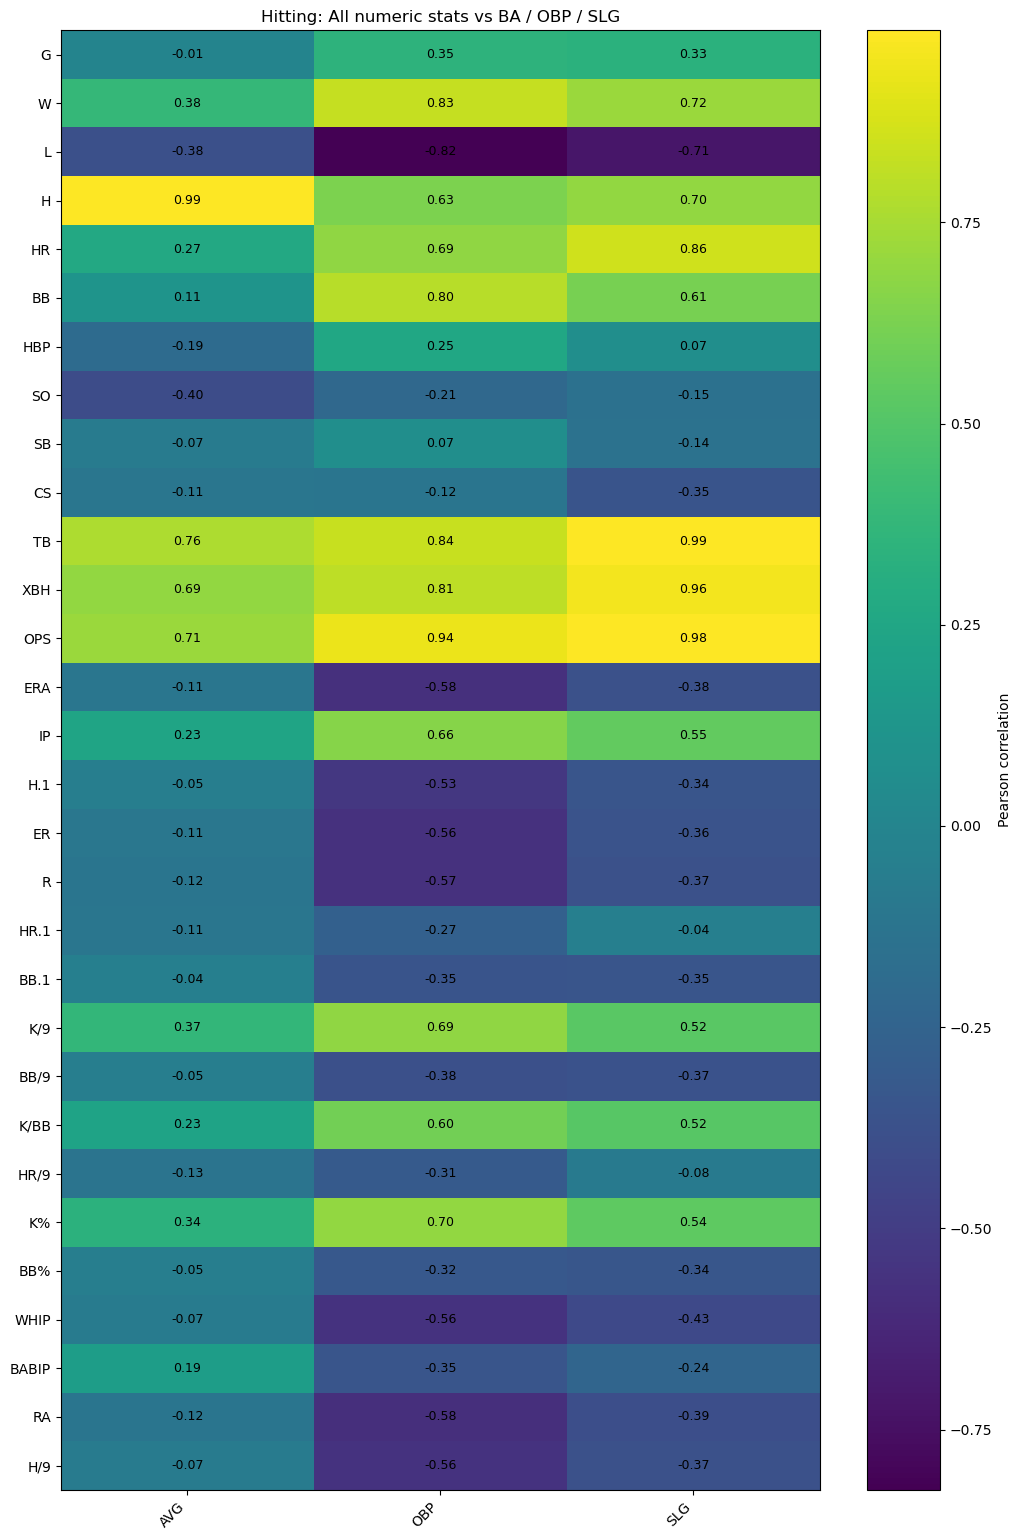

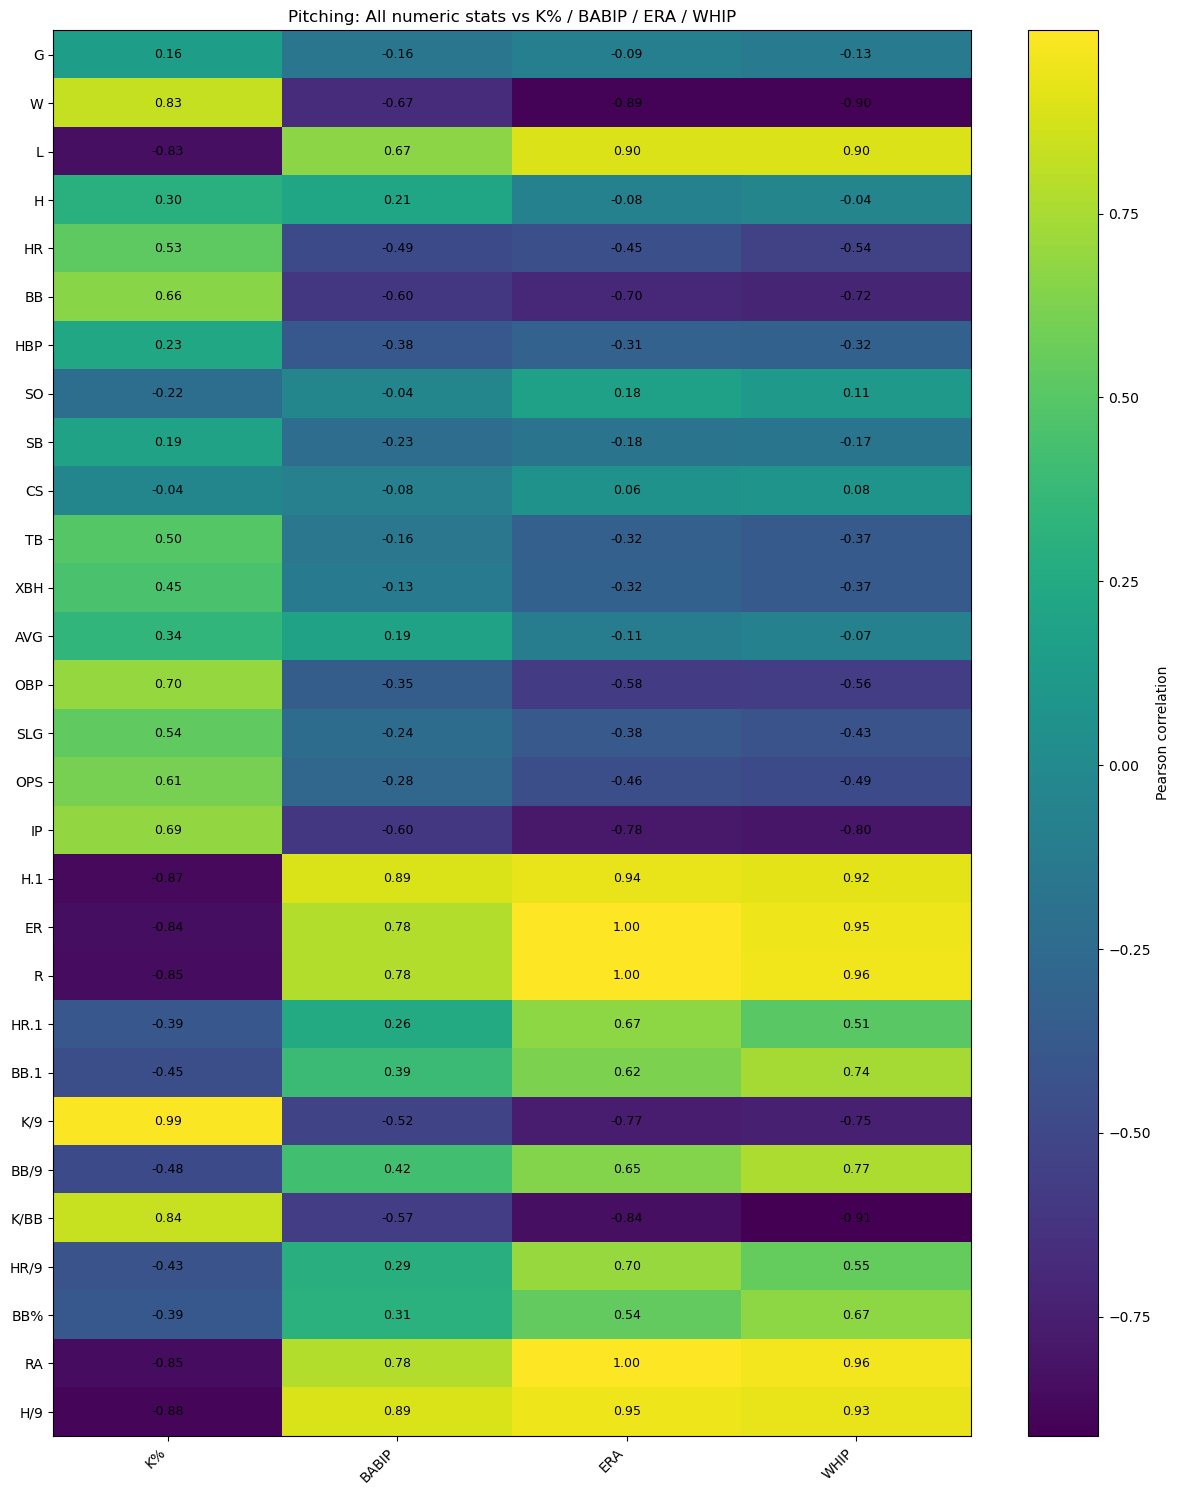

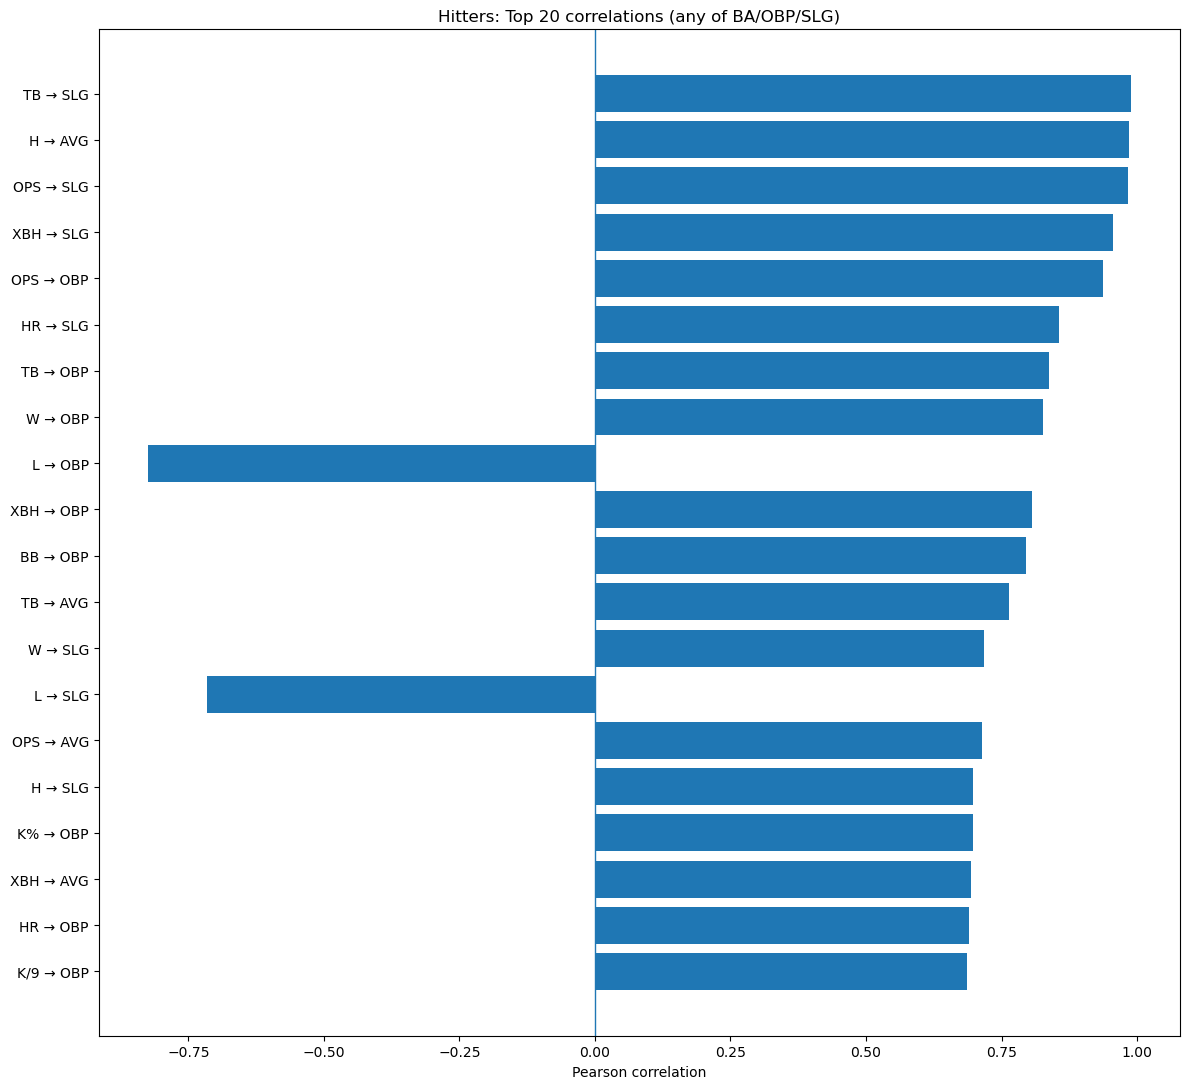

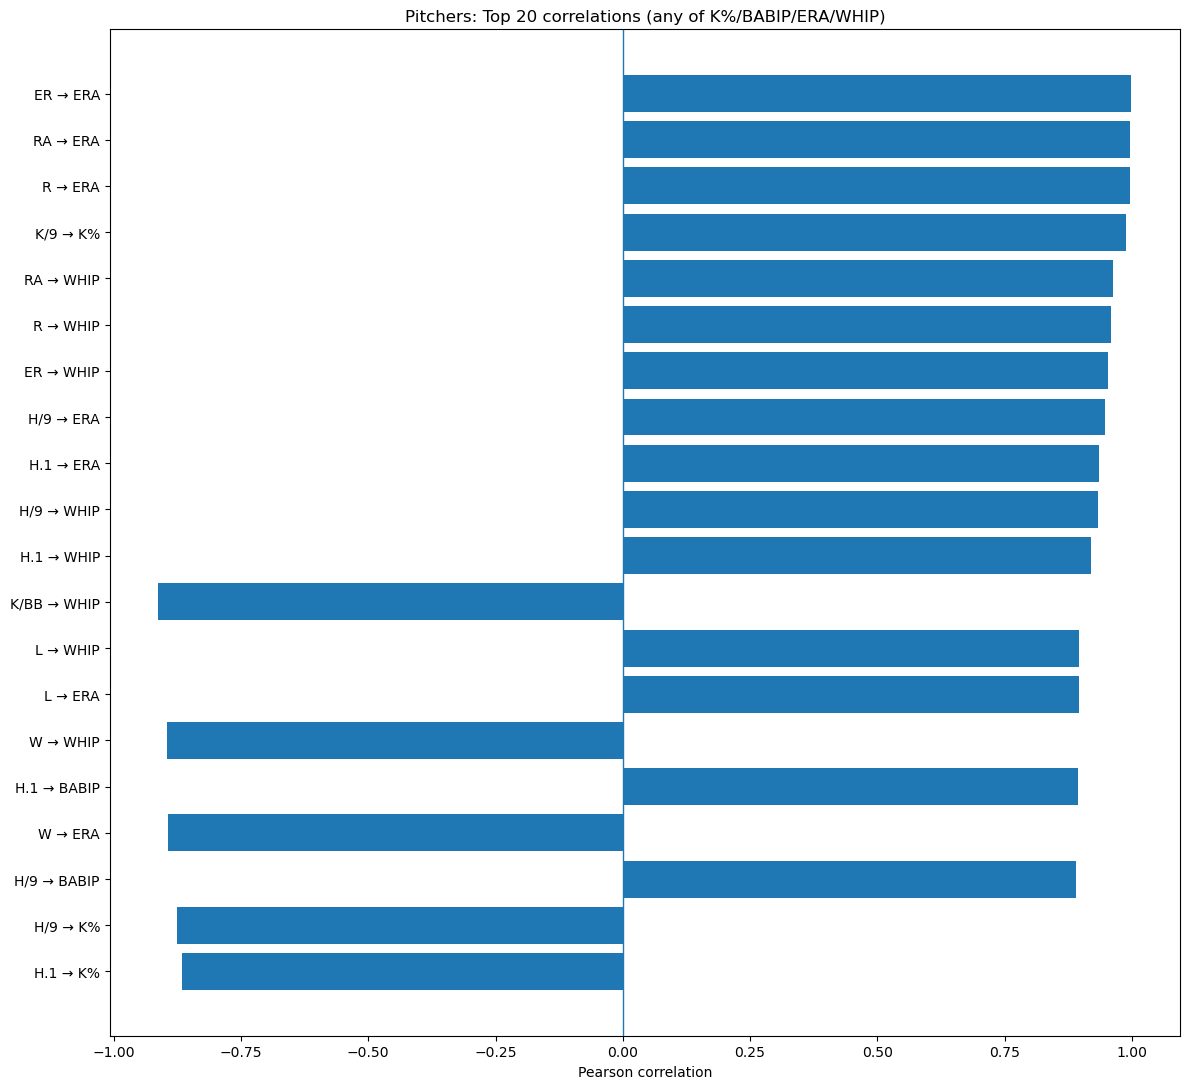

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Heatmap plotter (wide + labeled)
# -----------------------------
def plot_corr_heatmap(corr_df, title):
    data = corr_df.to_numpy(dtype=float)

    fig_w = 1.8 * corr_df.shape[1] + 5   # wider for more outcomes
    fig_h = 0.45 * corr_df.shape[0] + 2  # taller for more predictors

    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    im = ax.imshow(data, aspect="auto")

    ax.set_xticks(range(corr_df.shape[1]))
    ax.set_xticklabels(corr_df.columns, rotation=45, ha="right")
    ax.set_yticks(range(corr_df.shape[0]))
    ax.set_yticklabels(corr_df.index)

    ax.set_title(title)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Pearson correlation")

    # annotate each cell
    for i in range(corr_df.shape[0]):
        for j in range(corr_df.shape[1]):
            val = corr_df.iat[i, j]
            if not np.isnan(val):
                ax.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=9)

    plt.tight_layout()
    plt.show()

# -----------------------------
# Top-N horizontal bar chart (strongest by abs correlation)
# outcome = choose which target column to show
# -----------------------------
def plot_top_correlations(top_df, outcome=None, top_n=15, title="Top correlations"):
    d = top_df.copy()

    if outcome is not None:
        d = d[d["outcome"] == outcome].copy()

    d = d.head(top_n).copy()
    # label for y-axis
    d["label"] = d["stat"].astype(str) + " → " + d["outcome"].astype(str)

    fig_w = 12
    fig_h = 0.45 * len(d) + 2
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))

    ax.barh(d["label"][::-1], d["corr"][::-1])
    ax.axvline(0, linewidth=1)
    ax.set_title(title)
    ax.set_xlabel("Pearson correlation")

    plt.tight_layout()
    plt.show()

# =========================================================
# 1) HEATMAPS (full correlation matrices)
# =========================================================
plot_corr_heatmap(hit_corr, "Hitting: All numeric stats vs BA / OBP / SLG")
plot_corr_heatmap(pit_corr, "Pitching: All numeric stats vs K% / BABIP / ERA / WHIP")

# =========================================================
# 2) TOP relationships overall
# =========================================================
plot_top_correlations(hit_top, outcome=None, top_n=20, title="Hitters: Top 20 correlations (any of BA/OBP/SLG)")
plot_top_correlations(pit_top, outcome=None, top_n=20, title="Pitchers: Top 20 correlations (any of K%/BABIP/ERA/WHIP)")

# =========================================================
# 3) OPTIONAL: top relationships per outcome
# (uncomment any you want)
# =========================================================
# plot_top_correlations(hit_top, outcome=hit_corr.columns[0], top_n=15, title=f"Hitters: Top 15 vs {hit_corr.columns[0]}")
# plot_top_correlations(hit_top, outcome=hit_corr.columns[1], top_n=15, title=f"Hitters: Top 15 vs {hit_corr.columns[1]}")
# plot_top_correlations(hit_top, outcome=hit_corr.columns[2], top_n=15, title=f"Hitters: Top 15 vs {hit_corr.columns[2]}")

# plot_top_correlations(pit_top, outcome=pit_corr.columns[0], top_n=15, title=f"Pitchers: Top 15 vs {pit_corr.columns[0]}")
# plot_top_correlations(pit_top, outcome=pit_corr.columns[1], top_n=15, title=f"Pitchers: Top 15 vs {pit_corr.columns[1]}")
# plot_top_correlations(pit_top, outcome=pit_corr.columns[2], top_n=15, title=f"Pitchers: Top 15 vs {pit_corr.columns[2]}")
# plot_top_correlations(pit_top, outcome=pit_corr.columns[3], top_n=15, title=f"Pitchers: Top 15 vs {pit_corr.columns[3]}")


In [7]:
# ============================
# MLB Team Win% Correlation + "Advanced Stat Breakdown"
# FULL script with AUTO-DETECT BASE_DIR (fixes Desktop vs OneDrive vs VS Code cwd issues)
# ============================

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 0) AUTO-DETECT THE FOLDER THAT CONTAINS YOUR FILES
# ----------------------------
TEAM_FILENAME = "TEAM STATS LAST 10 YEARS.xlsx"
HITTER_ADV_FILENAME = "hitter_adv_vs_broad_corr_2025.csv"
PITCHER_ADV_FILENAME = "pitcher_adv_vs_broad_corr_2025.csv"

def find_base_dir_by_team_file(filename: str) -> Path | None:
    """
    Tries common locations first, then searches under your user home directory
    for the Excel file, and returns the folder containing it.
    """
    home = Path.home()

    # 1) Try current working directory (VS Code Jupyter often runs from the opened folder)
    cwd = Path.cwd()
    if (cwd / filename).exists():
        return cwd

    # 2) Try common "Desktop/Documents" locations (including OneDrive redirection)
    candidates = [
        home / "Desktop" / "Baseball self project",
        home / "Documents" / "Baseball self project",
        home / "OneDrive" / "Desktop" / "Baseball self project",
        home / "OneDrive" / "Documents" / "Baseball self project",
        home / "OneDrive" / "Desktop" / "Baseball self project" / "BASEBALL SELF PROJECT",
        home / "Desktop" / "BASEBALL SELF PROJECT",
        home / "Documents" / "BASEBALL SELF PROJECT",
    ]

    for c in candidates:
        if c.exists() and (c / filename).exists():
            return c

    # 3) Last resort: search under home for the TEAM file (can take a bit if home is huge)
    #    This is still usually fast enough for typical user folders.
    try:
        for p in home.rglob(filename):
            if p.is_file():
                return p.parent
    except Exception:
        pass

    return None

BASE_DIR = find_base_dir_by_team_file(TEAM_FILENAME)
if BASE_DIR is None:
    raise FileNotFoundError(
        f"Could not locate '{TEAM_FILENAME}' anywhere under your user folder.\n"
        f"Your user folder is: {Path.home()}\n\n"
        "Fix:\n"
        "1) Put 'TEAM STATS LAST 10 YEARS.xlsx' in the same folder as this notebook, OR\n"
        "2) Put it in a folder named 'Baseball self project' on Desktop/Documents/OneDrive, OR\n"
        "3) Update TEAM_FILENAME to match the exact file name."
    )

print("✅ Using BASE_DIR:", str(BASE_DIR))

# Build full paths
TEAM_XLSX   = BASE_DIR / TEAM_FILENAME
HITTER_ADV  = BASE_DIR / HITTER_ADV_FILENAME
PITCHER_ADV = BASE_DIR / PITCHER_ADV_FILENAME

# Output paths
OUT_CORR   = BASE_DIR / "team_stat_correlations_10yr.csv"
OUT_PLOT   = BASE_DIR / "top15_winpct_correlations.png"
OUT_DECOMP = BASE_DIR / "advanced_breakdown_tables.csv"

# ----------------------------
# 1) SANITY CHECK: REQUIRED FILES
# ----------------------------
required = [TEAM_XLSX, HITTER_ADV, PITCHER_ADV]
missing = [p for p in required if not p.exists()]

if missing:
    print("\nFiles actually found in BASE_DIR:")
    for f in sorted(BASE_DIR.iterdir()):
        if f.is_file():
            print(" -", f.name)

    raise FileNotFoundError(
        "\nMissing files (expected EXACT names):\n" + "\n".join(str(p) for p in missing) +
        "\n\nFix:\n"
        "1) Rename the files to match exactly, OR\n"
        "2) Update HITTER_ADV_FILENAME / PITCHER_ADV_FILENAME above to match the filenames shown."
    )

print("✅ Found all required files.")

# ----------------------------
# 2) LOAD TEAM DATA (10-YEAR TOTALS) + WIN%
# ----------------------------
team = pd.read_excel(TEAM_XLSX)
team.columns = [str(c).strip() for c in team.columns]

for col in ["G", "W", "L"]:
    if col not in team.columns:
        raise ValueError(
            f"Expected column '{col}' not found in TEAM file.\n"
            f"Columns present:\n{team.columns.tolist()}"
        )

team["WinPct"] = team["W"] / team["G"]

num_cols = team.select_dtypes(include=[np.number]).columns.tolist()
exclude = {"G", "W", "L", "WinPct"}
stat_cols = [c for c in num_cols if c not in exclude]

# ----------------------------
# 3) CORRELATIONS vs WIN%
# ----------------------------
rows = []
for stat in stat_cols:
    x = team[stat]
    y = team["WinPct"]

    if x.isna().all():
        continue
    if x.nunique(dropna=True) <= 1:
        continue

    pear = x.corr(y, method="pearson")
    spear = x.corr(y, method="spearman")

    rows.append({
        "target": "WinPct",
        "stat": stat,
        "pearson": pear,
        "spearman": spear,
        "abs_pearson": abs(pear) if pd.notna(pear) else np.nan
    })

corr_df = pd.DataFrame(rows).sort_values("abs_pearson", ascending=False)
corr_df.to_csv(OUT_CORR, index=False)

print(f"\n✅ Saved correlations:\n{OUT_CORR}")
print("\nTop 15 correlations with Win%:")
print(corr_df.head(15)[["stat", "pearson", "spearman"]].to_string(index=False))

# ----------------------------
# 4) PLOT TOP 15 (ABS) CORRELATIONS
# ----------------------------
top15 = corr_df.head(15).copy()

plt.figure(figsize=(11, 7))
plt.barh(top15["stat"][::-1], top15["pearson"][::-1])
plt.axvline(0, linewidth=1)
plt.title("Top 15 Team Stats Correlated with Win% (10-year aggregated team totals)")
plt.xlabel("Pearson correlation with Win% across teams")
plt.tight_layout()
plt.savefig(OUT_PLOT, dpi=200)
plt.close()

print(f"\n✅ Saved plot:\n{OUT_PLOT}")

# ----------------------------
# 5) LOAD ADVANCED-VS-BROAD TABLES (2025)
# ----------------------------
h_adv = pd.read_csv(HITTER_ADV)
p_adv = pd.read_csv(PITCHER_ADV)

# Normalize the stat-name column
if "Unnamed: 0" in h_adv.columns:
    h_adv = h_adv.rename(columns={"Unnamed: 0": "advanced"})
elif "advanced" not in h_adv.columns:
    raise ValueError(f"Hitter advanced file missing stat-name column. Columns: {h_adv.columns.tolist()}")

if "Unnamed: 0" in p_adv.columns:
    p_adv = p_adv.rename(columns={"Unnamed: 0": "advanced"})
elif "advanced" not in p_adv.columns:
    raise ValueError(f"Pitcher advanced file missing stat-name column. Columns: {p_adv.columns.tolist()}")

# ----------------------------
# 6) FUNCTION: RANK ADVANCED "DRIVERS" OF A BROAD STAT
# ----------------------------
def rank_adv(df: pd.DataFrame, broad_col: str, topn: int = 8) -> pd.DataFrame:
    if broad_col not in df.columns:
        return pd.DataFrame(columns=["advanced", broad_col, "abs_corr"])

    tmp = df[["advanced", broad_col]].copy().dropna()
    tmp[broad_col] = pd.to_numeric(tmp[broad_col], errors="coerce")
    tmp = tmp.dropna()

    tmp["abs_corr"] = tmp[broad_col].abs()
    return tmp.sort_values("abs_corr", ascending=False).head(topn)

# ----------------------------
# 7) BUILD + SAVE BREAKDOWN TABLES
# ----------------------------
breakdown_specs = []

# Hitting
for broad in ["OBP_approx", "HR_rate", "BA", "BABIP"]:
    if broad in h_adv.columns:
        breakdown_specs.append((f"Hitting: drivers of {broad}", h_adv, broad))

# Pitching
for broad in ["p_era", "k_percent", "bb_percent", "babip"]:
    if broad in p_adv.columns:
        breakdown_specs.append((f"Pitching: drivers of {broad}", p_adv, broad))

combined = []
for section, df, broad in breakdown_specs:
    ranked = rank_adv(df, broad, topn=8)
    ranked.insert(0, "section", section)
    combined.append(ranked)

if combined:
    decomp_df = pd.concat(combined, ignore_index=True)
    decomp_df.to_csv(OUT_DECOMP, index=False)
    print(f"\n✅ Saved advanced breakdown table:\n{OUT_DECOMP}")
else:
    print("\n⚠️ No breakdown tables created. (Your advanced CSVs may not have the expected columns.)")
    print("Hitter columns:", list(h_adv.columns))
    print("Pitcher columns:", list(p_adv.columns))

# ----------------------------
# 8) PRINT SUMMARY (FOR WRITEUP)
# ----------------------------
print("\n============================")
print("SUMMARY (Use this in your story)")
print("============================")

top_pos = corr_df.sort_values("pearson", ascending=False).head(10)[["stat", "pearson"]]
top_neg = corr_df.sort_values("pearson", ascending=True).head(10)[["stat", "pearson"]]

print("\nTop POSITIVE correlations with Win% (higher is better):")
print(top_pos.to_string(index=False))

print("\nTop NEGATIVE correlations with Win% (lower is better):")
print(top_neg.to_string(index=False))

print("\n✅ DONE. Outputs written to:")
print(" -", OUT_CORR)
print(" -", OUT_PLOT)
print(" -", OUT_DECOMP)


# ==========================================================
# Sidebar: why this fixes your error + why it works
# ==========================================================
# 1) Your error was purely a PATH issue: VS Code/Jupyter often runs in a folder
#    that is NOT exactly C:\Users\Matthew\Desktop\... (especially if OneDrive redirects Desktop).
#    This script finds the folder by locating the Excel file itself.
#
# 2) The correlation piece works because we:
#    - compute WinPct = W / G (normalized target)
#    - correlate each numeric stat with WinPct (Pearson and Spearman)
#
# 3) The “advanced breakdown” works because your 2025 files are already a matrix of
#    advanced_stat -> correlation with broad stat. We just rank by absolute value.


✅ Using BASE_DIR: c:\Users\Matthew\OneDrive\Desktop\Baseball self project
✅ Found all required files.

✅ Saved correlations:
c:\Users\Matthew\OneDrive\Desktop\Baseball self project\team_stat_correlations_10yr.csv

Top 15 correlations with Win%:
stat   pearson  spearman
  RA -0.898017 -0.913707
WHIP -0.895381 -0.894917
 ERA -0.894250 -0.898064
   R -0.889305 -0.888518
  ER -0.884857 -0.866518
K/BB  0.853359  0.855076
 H/9 -0.843303 -0.808193
  IP  0.840342  0.817444
  K%  0.834534  0.813314
 OBP  0.825965  0.810788
  BB  0.825845  0.837913
 H.1 -0.816781 -0.735706
 OPS  0.776032  0.709261
 K/9  0.763454  0.729943
 SLG  0.716929  0.646031

✅ Saved plot:
c:\Users\Matthew\OneDrive\Desktop\Baseball self project\top15_winpct_correlations.png

✅ Saved advanced breakdown table:
c:\Users\Matthew\OneDrive\Desktop\Baseball self project\advanced_breakdown_tables.csv

SUMMARY (Use this in your story)

Top POSITIVE correlations with Win% (higher is better):
stat  pearson
K/BB 0.853359
  IP 0.840342


In [8]:
# ============================================================
# MLB TEAM WIN% REGRESSION (CONDITIONAL / CAUSAL-STYLE ANALYSIS)
# ============================================================
# What this does:
# 1) Loads 10-year team stats
# 2) Builds Win%
# 3) Runs a standardized regression to see which stats
#    matter AFTER controlling for others
# 4) Checks multicollinearity (VIF)
#
# Interpretation:
# - Significant coefficients = independent importance
# - Standardized betas = relative strength
# ============================================================

import os
from pathlib import Path
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ------------------------------------------------------------
# 0) AUTO-DETECT BASE DIRECTORY (same logic that worked before)
# ------------------------------------------------------------
TEAM_FILENAME = "TEAM STATS LAST 10 YEARS.xlsx"

def find_base_dir(filename: str) -> Path:
    home = Path.home()

    # Try current working directory
    cwd = Path.cwd()
    if (cwd / filename).exists():
        return cwd

    # Common Desktop / Documents / OneDrive locations
    candidates = [
        home / "Desktop" / "Baseball self project",
        home / "Documents" / "Baseball self project",
        home / "OneDrive" / "Desktop" / "Baseball self project",
        home / "OneDrive" / "Documents" / "Baseball self project",
    ]

    for c in candidates:
        if c.exists() and (c / filename).exists():
            return c

    # Last resort: search under home
    for p in home.rglob(filename):
        return p.parent

    raise FileNotFoundError(f"Could not locate {filename}")

BASE_DIR = find_base_dir(TEAM_FILENAME)
print("✅ Using BASE_DIR:", BASE_DIR)

TEAM_XLSX = BASE_DIR / TEAM_FILENAME

# ------------------------------------------------------------
# 1) LOAD TEAM DATA + BUILD WIN%
# ------------------------------------------------------------
team = pd.read_excel(TEAM_XLSX)
team.columns = [c.strip() for c in team.columns]

required_cols = ["G", "W", "ERA", "K/BB", "OBP", "SLG"]
missing = [c for c in required_cols if c not in team.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

team["WinPct"] = team["W"] / team["G"]

# ------------------------------------------------------------
# 2) SELECT REGRESSION VARIABLES
# ------------------------------------------------------------
# Clean, non-redundant model:
# - ERA      → run prevention
# - K/BB     → pitching dominance
# - OBP      → plate discipline
# - SLG      → power

features = ["ERA", "K/BB", "OBP", "SLG"]
df = team[["WinPct"] + features].dropna()

X = df[features]
y = df["WinPct"]

# ------------------------------------------------------------
# 3) STANDARDIZE FEATURES (IMPORTANT)
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=features)

# Add intercept
X_scaled_const = sm.add_constant(X_scaled)

# ------------------------------------------------------------
# 4) RUN REGRESSION
# ------------------------------------------------------------
model = sm.OLS(y, X_scaled_const).fit()

print("\n================ REGRESSION RESULTS ================")
print(model.summary())

# ------------------------------------------------------------
# 5) EXTRACT STANDARDIZED EFFECTS (EASY TO READ)
# ------------------------------------------------------------
coef_df = pd.DataFrame({
    "Variable": model.params.index,
    "Std_Coefficient": model.params.values,
    "p_value": model.pvalues.values
})

coef_df = coef_df[coef_df["Variable"] != "const"] \
            .sort_values("Std_Coefficient", key=abs, ascending=False)

print("\n================ STANDARDIZED EFFECTS ================")
print(coef_df.to_string(index=False))

# ------------------------------------------------------------
# 6) CHECK MULTICOLLINEARITY (VIF)
# ------------------------------------------------------------
vif_df = pd.DataFrame()
vif_df["Variable"] = X_scaled_const.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_scaled_const.values, i)
    for i in range(X_scaled_const.shape[1])
]

print("\n================ VIF (COLLINEARITY CHECK) ================")
print(vif_df.to_string(index=False))

# ------------------------------------------------------------
# 7) INTERPRETATION GUIDE (PRINTED)
# ------------------------------------------------------------
print("\n================ HOW TO INTERPRET THIS ================")
print("""
• Coefficient sign:
    Positive  → increases Win%
    Negative  → decreases Win%

• Standardized coefficients:
    Larger absolute value = stronger independent effect

• p-value:
    < 0.05 → statistically significant after controlling for others

• VIF:
    < 5   → good
    5–10  → caution
    > 10  → redundant variable (drop or replace)

This model answers:
"Which stats still matter for winning once others are held constant?"
""")

print("\n✅ Regression analysis complete.")


✅ Using BASE_DIR: c:\Users\Matthew\OneDrive\Desktop\Baseball self project

================ REGRESSION RESULTS ================
                            OLS Regression Results                            
Dep. Variable:                 WinPct   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     231.2
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           2.36e-19
Time:                        18:35:14   Log-Likelihood:                 102.43
No. Observations:                  30   AIC:                            -194.9
Df Residuals:                      25   BIC:                            -187.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

^^^ Tells us the important values of winning

In [15]:
# ============================================================
# BASE HITTER REGRESSION (AGGREGATE SKILLS ONLY)
# - Predicts next-year SLG (or same-year SLG fallback)
# - Uses your rolling hitter sheet: stats (18).csv
# - Compatible with the pitcher base regression style
# ============================================================

import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

# -------------------------
# Helpers
# -------------------------
def pick(df, names):
    for n in names:
        if n in df.columns:
            return n
    return None

def num(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def eval_model(y, yhat, label):
    print(f"\n📌 {label}")
    print(f"R²  = {r2_score(y, yhat):.3f}")
    print(f"MAE = {mean_absolute_error(y, yhat):.4f}")

# -------------------------
# Load data
# -------------------------
df = pd.read_csv("stats (18).csv")
df.columns = [c.strip() for c in df.columns]

print("Rows:", len(df))
print("Years:", sorted(df["year"].dropna().unique()) if "year" in df.columns else "No year col?")

# -------------------------
# Identify required columns
# -------------------------
pid  = pick(df, ["player_id", "playerid", "mlbam_id", "id"])
year = pick(df, ["year", "Year", "season", "Season"])

# raw SLG in your file is slg_percent
slg  = pick(df, ["slg_percent", "SLG", "slg", "slugging", "slugging_percent"])

# workload
pa   = pick(df, ["pa", "PA", "plate_appearances", "PlateAppearances"])

# core skill features (only use if present)
age  = pick(df, ["player_age", "age"])
xslg = pick(df, ["xslg", "xSLG"])
xwoba= pick(df, ["xwoba", "xWOBA"])
ev   = pick(df, ["exit_velocity_avg"])
la   = pick(df, ["launch_angle_avg"])
bar  = pick(df, ["barrel_batted_rate", "barrel_percent"])
hh   = pick(df, ["hard_hit_percent"])
k    = pick(df, ["k_percent"])
bb   = pick(df, ["bb_percent"])
sweet= pick(df, ["sweet_spot_percent"])

if None in [pid, year, slg]:
    raise ValueError(f"Missing required columns: player_id, year, slg_percent/SLG. Detected: {pid}, {year}, {slg}")

# numeric conversion
df = num(df, [year, slg, pa, age, xslg, xwoba, ev, la, bar, hh, k, bb, sweet])

# workload filter (helps stability)
if pa:
    df = df[df[pa] >= 200].copy()

# -------------------------
# Feature set (aggregate only)
# -------------------------
features = [slg]  # include current SLG (strong baseline signal for next-year SLG)
for c in [xslg, xwoba, ev, la, bar, hh, k, bb, sweet, age, pa]:
    if c:
        features.append(c)

features = list(dict.fromkeys(features))  # de-dup
print("Features used:", features)

# -------------------------
# Next-year target
# -------------------------
df = df.sort_values([pid, year])
df["next_SLG"] = df.groupby(pid)[slg].shift(-1)

train = df.dropna(subset=["next_SLG"] + features)

USE_NEXT_YEAR = len(train) >= 60 and train[year].nunique() >= 2
target = "next_SLG" if USE_NEXT_YEAR else slg
model_df = train if USE_NEXT_YEAR else df.dropna(subset=[slg] + features)

print("\nUsing target:", target)

# -------------------------
# Train/test split
# -------------------------
if USE_NEXT_YEAR:
    yrs = sorted(model_df[year].unique())
    test_year = yrs[-1]
    tr = model_df[model_df[year] < test_year]
    te = model_df[model_df[year] == test_year]
    if len(tr) < 50 or len(te) < 20:
        tr, te = train_test_split(model_df, test_size=0.2, random_state=42)
else:
    tr, te = train_test_split(model_df, test_size=0.2, random_state=42)

X_tr, y_tr = tr[features], tr[target]
X_te, y_te = te[features], te[target]

# -------------------------
# Regression pipeline
# -------------------------
pipe = Pipeline([
    ("prep", ColumnTransformer([
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("sc", StandardScaler())
        ]), features)
    ])),
    ("ridge", Ridge(alpha=1.0))
])

pipe.fit(X_tr, y_tr)
pred = pipe.predict(X_te)

eval_model(y_te, pred, f"Hitter {target} regression")

# -------------------------
# Coefficient ranking (directional only)
# -------------------------
coef = pipe.named_steps["ridge"].coef_
coef_df = pd.DataFrame({"feature": features, "coef": coef}).sort_values("coef")

print("\nCoefficient ranking (positive = raises SLG):")
print(coef_df.to_string(index=False))

# -------------------------
# Projection output (latest year)
# -------------------------
latest_year = df[year].max()
latest = df[df[year] == latest_year].dropna(subset=features).copy()

latest["proj_SLG"] = pipe.predict(latest[features])
latest["delta_proj_minus_current"] = latest["proj_SLG"] - latest[slg]

out = latest[[pid, year, slg, "proj_SLG", "delta_proj_minus_current"]].sort_values(
    "delta_proj_minus_current", ascending=False
)

out.to_csv("hitter_base_regression_output.csv", index=False)

print("\nSaved: hitter_base_regression_output.csv")
print("\nTop projected improvers:")
print(out.head(10).to_string(index=False))
print("\nTop projected regression risks:")
print(out.tail(10).to_string(index=False))


Rows: 1872
Years: [np.int64(2023), np.int64(2024), np.int64(2025)]
Features used: ['slg_percent', 'xslg', 'xwoba', 'exit_velocity_avg', 'launch_angle_avg', 'barrel_batted_rate', 'hard_hit_percent', 'sweet_spot_percent', 'player_age']

Using target: next_SLG

📌 Hitter next_SLG regression
R²  = 0.207
MAE = 0.0658

Coefficient ranking (positive = raises SLG):
           feature      coef
barrel_batted_rate -0.018310
sweet_spot_percent -0.012928
        player_age -0.010921
             xwoba -0.010080
       slg_percent -0.003126
  hard_hit_percent  0.007385
  launch_angle_avg  0.012233
 exit_velocity_avg  0.013167
              xslg  0.059286

Saved: hitter_base_regression_output.csv

Top projected improvers:
 player_id  year  slg_percent  proj_SLG  delta_proj_minus_current
    672359  2025        0.071  0.441154                  0.370154
    656185  2025        0.000  0.329685                  0.329685
    671976  2025        0.000  0.313671                  0.313671
    668723  2025   

In [17]:
# ============================================================
# BASE PITCHER REGRESSION (UPDATED)
# - Uses ERA directly if present
# - Else computes ERA from ER & IP (only if needed)
# - Predicts next-year ERA (preferred) with safe fallback
# File: stats (20).csv  (your new 3-year pitcher sheet)
# ============================================================

import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

# -------------------------
# Helpers
# -------------------------
def pick(df, names):
    for n in names:
        if n in df.columns:
            return n
    return None

def num(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def eval_model(y, yhat, label):
    print(f"\n📌 {label}")
    print(f"R²  = {r2_score(y, yhat):.3f}")
    print(f"MAE = {mean_absolute_error(y, yhat):.4f}")

# -------------------------
# Load data
# -------------------------
df = pd.read_csv("stats (20).csv")
df.columns = [c.strip() for c in df.columns]

pid  = pick(df, ["player_id", "playerid", "mlbam_id", "id"])
year = pick(df, ["year", "Year", "season", "Season"])

# Prefer ERA if it exists
era = pick(df, ["ERA", "era", "p_era"])

# Only used if ERA is missing
er = pick(df, ["ER", "er", "earned_runs"])
ip = pick(df, ["IP", "ip", "innings_pitched", "p_formatted_ip"])

if pid is None or year is None:
    raise ValueError(f"Missing required columns: player_id and year. Detected: {pid}, {year}")

print("Rows:", len(df))
print("Years:", sorted(df[year].dropna().unique().tolist()))

# -------------------------
# Ensure we have ERA
# -------------------------
if era is None:
    # compute only if possible
    if er is None or ip is None:
        raise ValueError("No ERA column found, and cannot compute it (missing ER and/or IP).")
    df = num(df, [er, ip])
    df["ERA"] = np.where(df[ip] > 0, 9.0 * df[er] / df[ip], np.nan)
    era = "ERA"
else:
    df = num(df, [era])

# -------------------------
# Pull candidate predictors (aggregate only)
# -------------------------
pa    = pick(df, ["pa", "PA"])
age   = pick(df, ["player_age", "age"])
k     = pick(df, ["k_percent", "K%", "k_pct"])
bb    = pick(df, ["bb_percent", "BB%", "bb_pct"])
xwoba = pick(df, ["xwoba", "xWOBA"])
woba  = pick(df, ["woba", "wOBA"])
babip = pick(df, ["babip", "BABIP"])

# numeric conversion
df = num(df, [year, pa, age, k, bb, xwoba, woba, babip])

# workload filter (use PA if available; else no filter)
if pa is not None:
    df = df[df[pa] >= 150].copy()

# feature list
features = [era]  # include current ERA as baseline predictor
for c in [k, bb, xwoba, woba, babip, age, pa]:
    if c is not None and c in df.columns:
        features.append(c)
features = list(dict.fromkeys(features))

print("\nTarget ERA column:", era)
print("Features used:", features)

# -------------------------
# Next-year target
# -------------------------
df = df.sort_values([pid, year]).copy()
df["next_ERA"] = df.groupby(pid)[era].shift(-1)

train = df.dropna(subset=["next_ERA"] + features).copy()

# We DO have multiple years (2023–2025), so this should work,
# but keep it safe anyway.
USE_NEXT_YEAR = len(train) >= 40 and train[year].nunique() >= 2
target = "next_ERA" if USE_NEXT_YEAR else era
model_df = train if USE_NEXT_YEAR else df.dropna(subset=[era] + features).copy()

print("\nUsing target:", target, "| rows:", len(model_df))

# -------------------------
# Train/test split
# -------------------------
if USE_NEXT_YEAR:
    yrs = sorted(model_df[year].unique().tolist())
    test_year = yrs[-1]
    tr = model_df[model_df[year] < test_year].copy()
    te = model_df[model_df[year] == test_year].copy()

    # fallback if too small
    if len(tr) < 30 or len(te) < 15:
        tr, te = train_test_split(model_df, test_size=0.2, random_state=42)
else:
    tr, te = train_test_split(model_df, test_size=0.2, random_state=42)

X_tr, y_tr = tr[features], tr[target]
X_te, y_te = te[features], te[target]

# -------------------------
# Regression pipeline
# -------------------------
pipe = Pipeline([
    ("prep", ColumnTransformer([
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("sc", StandardScaler())
        ]), features)
    ])),
    ("ridge", Ridge(alpha=1.0))
])

pipe.fit(X_tr, y_tr)
pred = pipe.predict(X_te)

eval_model(y_te, pred, f"Pitcher {target} regression (Ridge)")

# -------------------------
# Coefficient ranking (directional)
# -------------------------
coef = pipe.named_steps["ridge"].coef_
coef_df = pd.DataFrame({"feature": features, "coef": coef}).sort_values("coef")

print("\nCoefficient ranking (negative = lowers ERA):")
print(coef_df.to_string(index=False))

# -------------------------
# Projection output (latest year)
# -------------------------
latest_year = df[year].max()
latest = df[df[year] == latest_year].dropna(subset=features).copy()

latest["proj_next_ERA"] = pipe.predict(latest[features])
latest["delta_proj_minus_current"] = latest["proj_next_ERA"] - latest[era]

out = latest[[pid, year, era, "proj_next_ERA", "delta_proj_minus_current"]].sort_values(
    "delta_proj_minus_current", ascending=True
)

out.to_csv("pitcher_base_regression_output.csv", index=False)

print("\nSaved: pitcher_base_regression_output.csv")
print("\nTop projected IMPROVERS (lower next-year ERA):")
print(out.head(10).to_string(index=False))
print("\nTop projected REGRESSION risks (higher next-year ERA):")
print(out.tail(10).to_string(index=False))


Rows: 2344
Years: [2023, 2024, 2025]

Target ERA column: p_era
Features used: ['p_era', 'k_percent', 'bb_percent', 'xwoba', 'woba', 'player_age', 'pa']

Using target: next_ERA | rows: 619

📌 Pitcher next_ERA regression (Ridge)
R²  = 0.114
MAE = 0.9004

Coefficient ranking (negative = lowers ERA):
   feature      coef
 k_percent -0.160460
      woba -0.053245
     p_era -0.022343
player_age  0.011542
        pa  0.043111
bb_percent  0.066227
     xwoba  0.222028

Saved: pitcher_base_regression_output.csv

Top projected IMPROVERS (lower next-year ERA):
 player_id  year  p_era  proj_next_ERA  delta_proj_minus_current
    687134  2025   9.36       4.822326                 -4.537674
    605447  2025   8.23       3.800945                 -4.429055
    687223  2025   8.91       4.594487                 -4.315513
    674285  2025   8.38       4.450550                 -3.929450
    666277  2025   8.35       4.553715                 -3.796285
    656557  2025   8.04       4.468787               